# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [2]:
import matplotlib.pyplot as plt
import numpy
import random

import scipy.optimize

This defines the function:

In [3]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

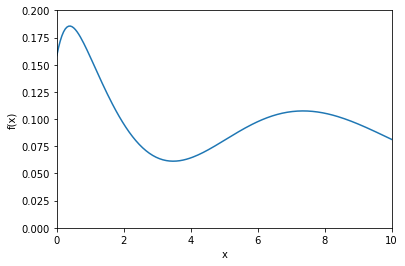

In [4]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [24]:
#
# Made a few assumptions when I wrote this:
#    * The boundaries are 0 <= x <= 10
#    * x should be a real number
#


def c(x):
    if x < 0:
        return 0
    if x > 10:
        return 1
    return (18*x + 1 + 24*numpy.arctan(x) - numpy.cos(2*numpy.sqrt(3*x)) - 2*numpy.sqrt(3*x)*numpy.sin(2*numpy.sqrt(3*x)))/(12*norm)

def F(x):
    if 0 <= x <= 10:
        return f(x)
    else:
        return f(x)

def genSample(npts):
    sample = []
    # Cumulative distribution function c(x)
    # If a uniformly-distributed random float between zero and one 
    #   is between c(n) and c(n+1), append n?
    progress_points = list(int(a) for a in numpy.linspace(0, 1, 10)*npts)
    for N in range(npts):
        v = random.random()
        # Not really sure how exactly the CDF can be inverted analytically...
        # Newton-Raphson method it is?
        # Bisection is actually way more stable...
        def func(x): return c(x) - v # Need to find the root of this!
        xp = 10
        xm = 0
        close_enough = False
        while not close_enough:
            mean = (xp+xm)/2
            if func(mean) < 0:
                xm = mean
            else:
                xp = mean
            close_enough = abs(xp-xm) < 1e-9
        sample.append(mean)
        #if N in progress_points:
        #    print(N)
    return numpy.array(sample)

In [25]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


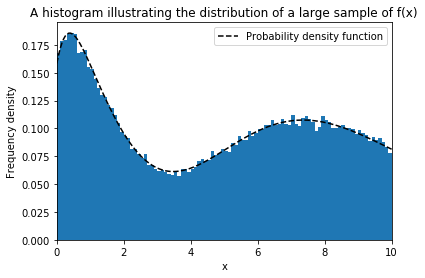

In [27]:
mainSample = genSample(100000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, fs, "k--", label="Probability density function")
ax.hist(mainSample, bins=100, density=True)
ax.set_xlabel("x")
ax.set_ylabel("Frequency density")
ax.set_title("A histogram illustrating the distribution of a large sample of f(x)")
ax.set_xlim(0, 10)
ax.legend()